TAXI_OUT PREDICTION

In this project I am gonna perform an EDA on the data set 'Flight Take Off Data - JFK Airport' as founf on kaggle.com.
Im then gonna create a simple regression model, a multiple regression model, a lasso regressiona and a ridge regression to predict the taxi_out and evaluate the models using R2 score.
Various tools used: string matching, one-hot coding, heatmap, trai_test_split(), StandardScaler(), RepeatedKFold()

In [102]:
# Importing libraries
# pandas for datatframe, numpy for the maths, matplotlib for visualisatioon of results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Import the library for predictive data analysis, used in machine learning, for create test data and 
# training data and to perfom linear regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold

In [2]:
# Creating the data frame
df = pd.read_csv('M1_final.csv')
df_copy_1 = df.copy(deep=True)
df_copy_2 = df.copy(deep=True)

# Check the dataframe shape
print(df.shape)

# The data set has 23 columns and 28818 rows (entries)

(28820, 23)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
df.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [5]:
df.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [85]:
df_copy_1.describe(include = 'all').T.round(3)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MONTH,28820.0,NaN,NaN,NaN,7.89424,4.991723,1.0,1.0,11.0,12.0,12.0
DAY_OF_MONTH,28820.0,NaN,NaN,NaN,16.021096,8.750179,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,28820.0,NaN,NaN,NaN,4.008952,1.98523,1.0,2.0,4.0,6.0,7.0
OP_UNIQUE_CARRIER,28820,9,B6,9589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,28820,2092,N102NN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEST,28820,65,LAX,2974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEP_DELAY,28820.0,NaN,NaN,NaN,6.374983,38.735144,-22.0,-6.0,-3.0,2.0,1276.0
CRS_ELAPSED_TIME,28820.0,NaN,NaN,NaN,225.288203,119.482417,57.0,124.0,188.0,365.0,697.0
DISTANCE,28820.0,NaN,NaN,NaN,1267.746079,889.343246,94.0,483.0,1029.0,2248.0,4983.0
CRS_DEP_M,28820.0,NaN,NaN,NaN,831.003851,299.398525,301.0,545.0,856.0,1095.0,1439.0


In [86]:
df['TAXI_OUT'].describe(include = 'all').round(3)

count    28818.000
mean        20.857
std          6.850
min          5.000
25%         16.000
50%         19.000
75%         25.000
max         41.000
Name: TAXI_OUT, dtype: float64

In [6]:
# Checking if there are nul values
# Just 2 null values in the wind category, will drop those 2

df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [7]:
# Dropping null values

df = df.dropna()
df.isnull().sum()


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [8]:
# IDENTIFYING CATEGORICAL FEATURES
# There are some categorical values (dtype = object) that I may want to encode/get rid off/reduced categories of
categorical_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
print('Categorical features:', categorical_columns)
print('Numerical continues features:', numerical_columns)

Categorical features: ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Dew Point', 'Wind', 'Condition']
Numerical continues features: ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT']


In [9]:
# ANALYSING CATEGORICAL FEATURES
# Checking how many unique values there are in the categorical columns, if they are too many, it may not be so relevant for this analysis

cardinality_carriers = df['OP_UNIQUE_CARRIER'].nunique()
cardinality_tail = df['TAIL_NUM'].nunique()
cardinality_dest = df['DEST'].nunique()
cardinality_dew_point = df['Dew Point'].nunique()
cardinality_wind = df['Wind'].nunique()
cardinality_condition = df['Condition'].nunique()

print('Cardinality of carriers: ', cardinality_carriers)
print('Cardinality of tail: ', cardinality_tail)
print('Cardinality of dest: ', cardinality_dest)
print('Cardinality of dew point: ', cardinality_dew_point)
print('Cardinality of wind: ', cardinality_wind)
print('Cardinality of condition: ', cardinality_condition)

Cardinality of carriers:  9
Cardinality of tail:  2092
Cardinality of dest:  65
Cardinality of dew point:  64
Cardinality of wind:  18
Cardinality of condition:  25


In [10]:
# FALSE CATEGORICAL VALUE
#Dew Point seems to be a numerical value, I will covert to int
df['Dew Point'] = df['Dew Point'].astype(int)

# Checking that data type has changed
column_dtype = df['Dew Point'].dtype
print("Data Type using dtype attribute:", column_dtype)

Data Type using dtype attribute: int32


In [11]:
# Categorical_columns that I may keep are wind and conditions
# Checking conditions and wind values
unique_values = df['Condition'].unique()
print("Unique Values using unique():", unique_values)

Unique Values using unique(): ['Fair / Windy' 'Fair' 'Light Rain / Windy' 'Partly Cloudy'
 'Mostly Cloudy' 'Cloudy' 'Light Rain' 'Mostly Cloudy / Windy'
 'Partly Cloudy / Windy' 'Light Snow / Windy' 'Cloudy / Windy'
 'Light Drizzle' 'Rain' 'Heavy Rain' 'Fog' 'Wintry Mix'
 'Light Freezing Rain' 'Light Snow' 'Wintry Mix / Windy' 'Fog / Windy'
 'Light Drizzle / Windy' 'Rain / Windy' 'Drizzle and Fog' 'Snow'
 'Heavy Rain / Windy']


In [12]:
unique_values = df['Wind'].unique()
print("Unique Values using unique():", unique_values)

Unique Values using unique(): ['W' 'WNW' 'NW' 'NNW' 'S' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR'
 'SSE' 'SSW' 'WSW' 'N' 'ESE']


In [13]:
#STRING MATCHING
#Using string matching to reduce categories in Condition
import re

df['Condition'] = df['Condition'].str.strip()

# Assuming df is your DataFrame and 'column_name' is the column you want to categorize
df['categorized_conditions'] = df['Condition'].apply(lambda x: 'FAIR' if re.search('Fair', x)                                             
                                                    else 'LIGHT DRIZZLE'if re.search('Light Drizzle', x)
                                                    else 'DRIZZLE&FOG' if re.search('Drizzle and Fog', x)
                                                    else 'CLOUDY' if re.search('Cloudy', x)
                                                    else 'LIGHT RAIN' if re.search('Light Rain', x)
                                                    else 'HEAVY RAIN' if re.search('Heavy Rain', x)
                                                    else 'FREEZING RAIN' if re.search('Light Freezing Rain', x)
                                                    else 'RAIN' if re.search('Rain', x)
                                                    else 'FOG' if re.search('Fog', x)
                                                    else 'FREEZING RAIN' if re.search('Light Freezing Rain', x)
                                                    else 'LIGHT SNOW' if re.search('Light Snow', x)
                                                    else 'WINTRY MIX' if re.search('Wintry Mix', x)
                                                    else 'SNOW' if re.search('Snow', x)
                                                    else 'others')

In [14]:
# Checking 'categorized_conditions' after string matching
unique_values_new = df['categorized_conditions'].unique()
print("Unique Values using unique():", unique_values_new)


Unique Values using unique(): ['FAIR' 'LIGHT RAIN' 'CLOUDY' 'LIGHT SNOW' 'LIGHT DRIZZLE' 'RAIN'
 'HEAVY RAIN' 'FOG' 'WINTRY MIX' 'FREEZING RAIN' 'DRIZZLE&FOG' 'SNOW']


In [15]:
print(df['categorized_conditions'].sample(20))

11887        CLOUDY
989            FAIR
24657        CLOUDY
18610          RAIN
486          CLOUDY
7692         CLOUDY
20518        CLOUDY
6791         CLOUDY
3316         CLOUDY
21118    LIGHT RAIN
10012    LIGHT RAIN
25616          FAIR
20484        CLOUDY
3530         CLOUDY
23891        CLOUDY
4422         CLOUDY
12573        CLOUDY
10044    LIGHT RAIN
27027        CLOUDY
7997         CLOUDY
Name: categorized_conditions, dtype: object


In [16]:
df.info()
#Condition is still there and categorized_conditions has been appended

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   28818 non-null  int64  
 1   DAY_OF_MONTH            28818 non-null  int64  
 2   DAY_OF_WEEK             28818 non-null  int64  
 3   OP_UNIQUE_CARRIER       28818 non-null  object 
 4   TAIL_NUM                28818 non-null  object 
 5   DEST                    28818 non-null  object 
 6   DEP_DELAY               28818 non-null  int64  
 7   CRS_ELAPSED_TIME        28818 non-null  int64  
 8   DISTANCE                28818 non-null  int64  
 9   CRS_DEP_M               28818 non-null  int64  
 10  DEP_TIME_M              28818 non-null  int64  
 11  CRS_ARR_M               28818 non-null  int64  
 12  Temperature             28818 non-null  int64  
 13  Dew Point               28818 non-null  int32  
 14  Humidity                28818 non-null  int

In [17]:
# Dropping 'TAIL_NUM' and 'Condition' to make it easier isolating predictors I want to use later on
columns_to_drop = ['Condition', 'TAIL_NUM']
df = df.drop(columns=columns_to_drop)

In [18]:
# Dropping DEST, introducing too many columns
columns_to_drop = ['DEST']
df = df.drop(columns=columns_to_drop)

In [19]:
# Dropping Wind, it does introduce too many columns
columns_to_drop = ['Wind']
df = df.drop(columns=columns_to_drop)

In [20]:
#Dropping OP_UNIQUE_CARRIER
columns_to_drop = ['OP_UNIQUE_CARRIER']
df = df.drop(columns=columns_to_drop)

In [21]:
#ONE-HOT CODING
# Hot-Encoding the Categorical Columns to transform them in numerical
categorical_column = ['categorized_conditions']

df = pd.get_dummies(df, columns=categorical_column, drop_first=True)


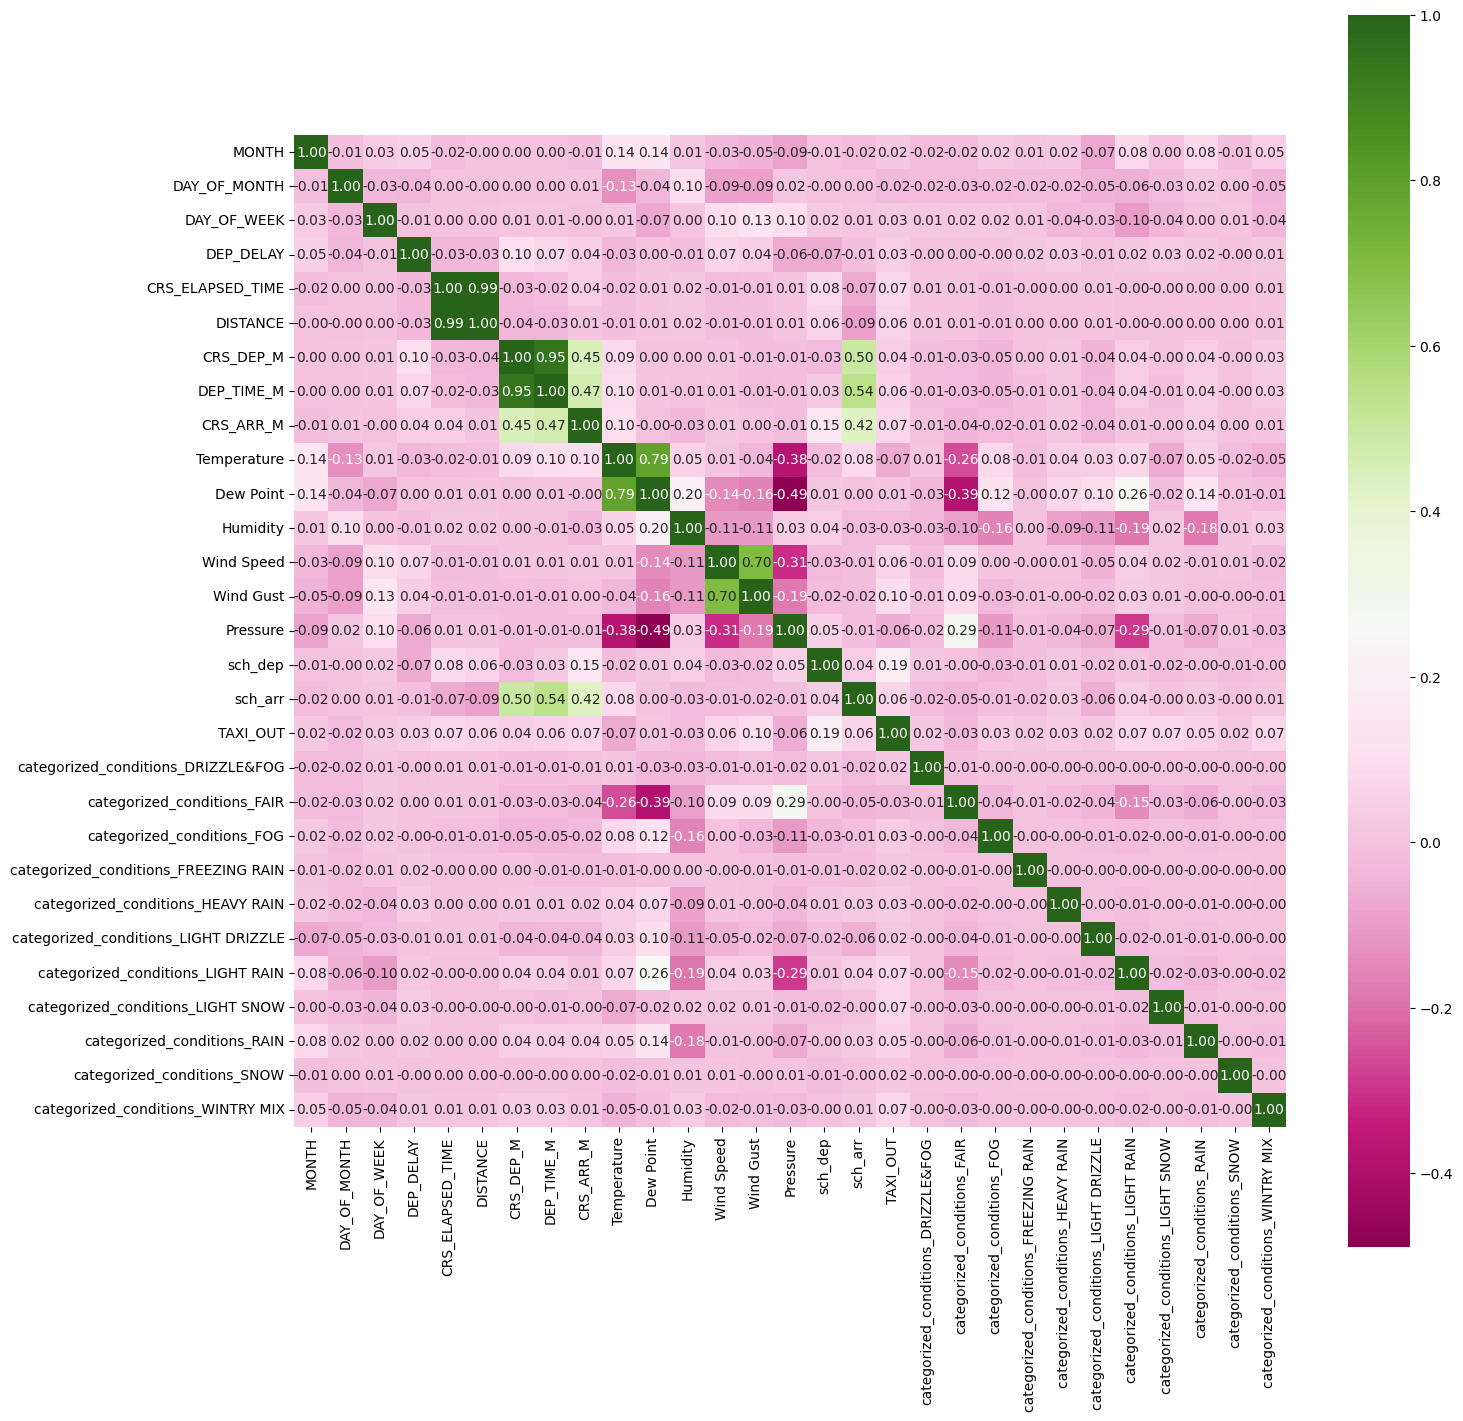

In [22]:
# Checking correlation between the data using heatmap in seaborn
fig, ax = plt.subplots(figsize=(16,16))
c=df.corr()
ax = sns.heatmap(c, vmax=1, annot=True, square=True, fmt=".2f", cmap='PiYG')

In [23]:
# Checking the data frame after one-hot coding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MONTH                                 28818 non-null  int64  
 1   DAY_OF_MONTH                          28818 non-null  int64  
 2   DAY_OF_WEEK                           28818 non-null  int64  
 3   DEP_DELAY                             28818 non-null  int64  
 4   CRS_ELAPSED_TIME                      28818 non-null  int64  
 5   DISTANCE                              28818 non-null  int64  
 6   CRS_DEP_M                             28818 non-null  int64  
 7   DEP_TIME_M                            28818 non-null  int64  
 8   CRS_ARR_M                             28818 non-null  int64  
 9   Temperature                           28818 non-null  int64  
 10  Dew Point                             28818 non-null  int32  
 11  Humidity            

MULTIPLE LINEAR REGRESSION - 
Using a subset of the features

In [93]:
# SIMPLIFIED MULTIPLE LINEAR REGRESSION

#Selecting the subset of predictors (.values return numpy.ndarray)
X = df[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_TIME_M','CRS_ARR_M','Temperature','Humidity','Wind Speed','sch_dep']].values
y = df['TAXI_OUT'].values
print(X.shape)
print(y.shape)

# Checking that X and y are indeed nparray and I can feed them to the Linear Regression
print(type(y))
print(type(X))


(28818, 9)
(28818,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [94]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 1/3, random_state=1)

In [95]:
# Normalisation of the data
#standard scaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test =scaler_x.transform(X_test)

In [96]:
# Fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [97]:
# Make prediction

y_pred = lr.predict(X_test)

In [98]:
# Checking results

result = {'Actual_TAXI_OUT': y_test, 'Predicted_TAXI_OUT': y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_TAXI_OUT,Predicted_TAXI_OUT
0,20,22.824135
1,20,22.379101
2,17,20.446887
3,19,18.155979
4,15,22.214424
...,...,...
9601,13,19.699936
9602,27,20.691121
9603,18,20.669284
9604,15,20.102103


SIMPLE LINEAR REGRESSION - Using only the most correlated feature

In [30]:
# SIMPLE LINEAR REGRESSION 
# Using only sch_dep as predictor

X_simple= df[['sch_dep']].values
y_simple = df['TAXI_OUT'].values
print(X_simple.shape)
print(y_simple.shape)

# Checking that X and y are indeed nparray and I can feed them to the Linear Regression
print(type(y_simple))
print(type(X_simple))

(28818, 1)
(28818,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
# Split the data
X_simple_train,X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple,y_simple, test_size= 1/3, random_state=1)

In [32]:
# Normalisation of the data
scaler_x = StandardScaler()
X_simple_train = scaler_x.fit_transform(X_simple_train)
X_simple_test =scaler_x.transform(X_simple_test)

In [33]:
# Fitting the model

lr_simple = LinearRegression()
lr_simple.fit(X_simple_train, y_simple_train)

LinearRegression()

In [34]:
# Make prediction

y_simple_pred = lr_simple.predict(X_simple_test)

In [35]:
# Checking results

result = {'Actual_TAXI_OUT': y_simple_test, 'Predicted_TAXI_OUT': y_simple_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_TAXI_OUT,Predicted_TAXI_OUT
0,20,23.693461
1,20,23.286577
2,17,19.217740
3,19,18.810857
4,15,23.015321
...,...,...
9601,13,19.353368
9602,27,21.659042
9603,18,22.065926
9604,15,20.031508


EVALUATING THE MODELS

In [42]:
# Evaluating the models: creating a function to evaluate the model

def model_evaluation(lr, X_test, y_test, model_name):
    y_pred = lr.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    #Mean Absolute Error: average absolute difference between the predicted and 
    #actual values. Lower MAE values indicate better model performance.
    MSE = metrics.mean_squared_error(y_test, y_pred)
    #Mean Squared Error: average squared difference between the predicted and actual values. 
    # Lower MSE values indicate better model performance.
    RMSE = np.sqrt(MSE)
    # Root Mean Squared Error: square root of the MSE and provides an interpretable measure 
    # of the average error in the same units as the target variable.
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [39]:
# Evaluating the simple linear regression and creating a data frame with the results
lr_simple_evaluation= model_evaluation(lr_simple, X_simple_test, y_simple_test, 'Simple Linear Regression')

result_lr_simple_evaluation = pd.DataFrame(lr_simple_evaluation)
result_lr_simple_evaluation

,Simple Linear Regression
MAE,5.417455
MSE,45.945211
RMSE,6.778290
R2-Score,0.036618


In [100]:
# Evaluating the multiple linear regression and creating a data frame with the results
lr_evaluation= model_evaluation(lr, X_test, y_test, 'Multiple Linear Regression')

result_lr_evaluation = pd.DataFrame(lr_evaluation).round(4)
result_lr_evaluation

,Multiple Linear Regression
MAE,5.3743
MSE,45.2788
RMSE,6.7290
R2-Score,0.0506


IMPROVING REGRESSION WITH RIDGE AND LASSO

LASSO

In [46]:
# Define dependent and independent variable
X_lasso = df[['sch_dep']].values
y_lasso= df['TAXI_OUT'].values

In [47]:
# Splitting the data
X_lasso_train,X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso,y_lasso, test_size= 1/3, random_state=1)

In [48]:
# Define model
model_lasso = Lasso(alpha=0.01)

In [49]:
# Fit the model
model_lasso.fit(X_lasso_train, y_lasso_train)

Lasso(alpha=0.01)

In [50]:
pred_lasso = model_lasso.predict(X_lasso_test)
lasso_df = pd.DataFrame({'Actual_score': y_lasso_test, 'Predicted_score' : pred_lasso})
lasso_df

,Actual_score,Predicted_score
0,20,23.691160
1,20,23.284605
2,17,19.219059
3,19,18.812505
4,15,23.013569
...,...,...
9601,13,19.354577
9602,27,21.658387
9603,18,22.064942
9604,15,20.032168


In [52]:
# tuning alpha, run kfold to decide alpha
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = RidgeCV(alphas=(0.5,1,0.01), cv=cv, scoring='neg_mean_absolute_error')

# Fit the model
model.fit(X_lasso, y_lasso)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [53]:
# summarise the chosen configuration
model.alpha_

0.01

RIDGE

In [54]:
# Define dependent and independent variable
X_ridge = df[['sch_dep']].values
y_ridge = df['TAXI_OUT'].values

In [55]:
# Splitting the data
X_ridge_train,X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge,y_ridge, test_size= 1/3, random_state=1)

In [56]:
# Define model
model_ridge = Ridge(alpha=0.01)

In [57]:
# Fit the model
model_ridge.fit(X_ridge_train,y_ridge_train)

Ridge(alpha=0.01)

In [58]:
pred_ridge = model_ridge.predict(X_ridge_test)
ridge_df= pd.DataFrame({'Actual_score': y_ridge_test, 'Predicted_score' : pred_ridge})
ridge_df

,Actual_score,Predicted_score
0,20,23.693461
1,20,23.286577
2,17,19.217740
3,19,18.810857
4,15,23.015321
...,...,...
9601,13,19.353368
9602,27,21.659042
9603,18,22.065926
9604,15,20.031508


In [59]:
# tuning alpha, run kfold to decide alpha
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = RidgeCV(alphas=(0.5,1,0.01), cv=cv, scoring='neg_mean_absolute_error')

# Fit the model
model.fit(X_ridge, y_ridge)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [60]:
# summarise the chosen configuration
model.alpha_

0.01

In [61]:
# Using r2_score() to evaluate the 2 models
r2_lasso = r2_score(y_lasso_test, pred_lasso)
r2_ridge = r2_score(y_ridge_test, pred_ridge)
print(r2_lasso)
print(r2_ridge)

0.03661561037633276
0.036617500445236595


In [89]:
# Using function model_evaluatio() on the lasso
lasso_evaluation= model_evaluation(model_lasso, X_lasso_test, y_lasso_test, 'Lasso')

result_lasso_evaluation = pd.DataFrame(lasso_evaluation)
lasso_evaluation

,Lasso
MAE,5.417491
MSE,45.945301
RMSE,6.778296
R2-Score,0.036616


In [90]:
# Using function model_evaluatio() on the ridge
ridge_evaluation= model_evaluation(model_ridge, X_ridge_test, y_ridge_test, 'Ridge')

result_ridge_evaluation = pd.DataFrame(ridge_evaluation)
ridge_evaluation

,Ridge
MAE,5.417455
MSE,45.945211
RMSE,6.778290
R2-Score,0.036618
